In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [3]:
fcounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")
flau = pd.read_csv(r"E:\netData\MAG-nobel\Nobel laureates.csv")
Nobelpapers = pd.read_csv("E:/netData/Nobel winners/Prize-winning paper record.csv")

In [4]:
flau['Is paired'] = flau['Laureate name'].map(dict(zip(fcounter['Laureate name'].unique() , [1]*361)))
flau.fillna(0 , inplace = True)

In [5]:
fflau = flau[flau['Is paired']==1]
fflau['Pub year']=fflau['Laureate name'].map(Nobelpapers.drop_duplicates(subset = 'Laureate name').set_index('Laureate name')['Pub year'])

# Analysis

In [6]:
fflau1 = fflau[fflau['field']=='Physics']
fflau2 = fflau[fflau['field']=='Chemistry']
fflau3 = fflau[fflau['field']=='Medicine ']

In [7]:
fcounter1 = fcounter[fcounter['Field']=='Physics']
fcounter2 = fcounter[fcounter['Field']=='Chemistry']
fcounter3 = fcounter[fcounter['Field']=='Medicine']

In [8]:
d1 = fflau1['h']
d2 = fflau2['h']
d3 = fflau3['h']
d5 = fcounter1['h']
d6 = fcounter2['h']
d7 = fcounter3['h']
dd = [ d1,d2,d3,d5,d6,d7]
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

In [9]:
y_pos = [1,2,]
plt.rcParams['font.sans-serif'] = ['Arial']  # Use a Chinese font

([<matplotlib.axis.YTick at 0x1edb55f2220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

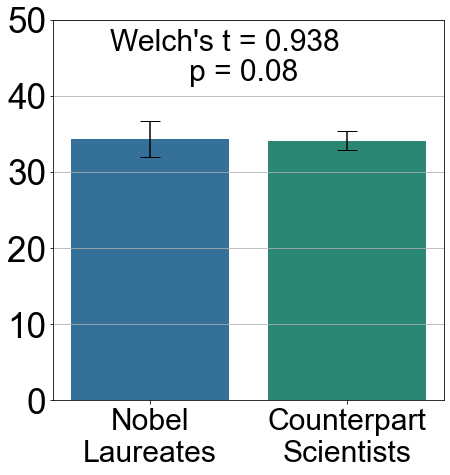

In [11]:
f, ax = plt.subplots(figsize=(7, 7))
plt.bar(y_pos, [d[0],d[3]], yerr=[std[0],std[3]],align='center', color= ['#1F618D','#117A65'],alpha=0.9,capsize=10)
t,p = scipy.stats.ttest_ind(dd[0].dropna() , dd[3].dropna(), equal_var=False, alternative='two-sided')
plt.text(0.8,46,"Welch's t = {}".format(np.around (p, 3 )),fontsize = 30)
plt.text(1.2,42,"p = {}".format(np.around (t, 2 )),fontsize = 30)

ax.yaxis.grid(True)
plt.xticks(y_pos,['Nobel\nLaureates','Counterpart\nScientists'],fontsize = 30)
plt.yticks([0,10,20,30,40,50],size = 35)

In [12]:
columnlst = ['pub num', 'total cit', 'h', 'g','max cit']
labellst = ['pub num', 'total cit', 'h', 'g','max cit']
tilst = ['Physics', 'Chemistry', 'Medicine']

ytic1 = [460,400000,73,136,4600]
ytic2 = [420,160000,67,125,4200]

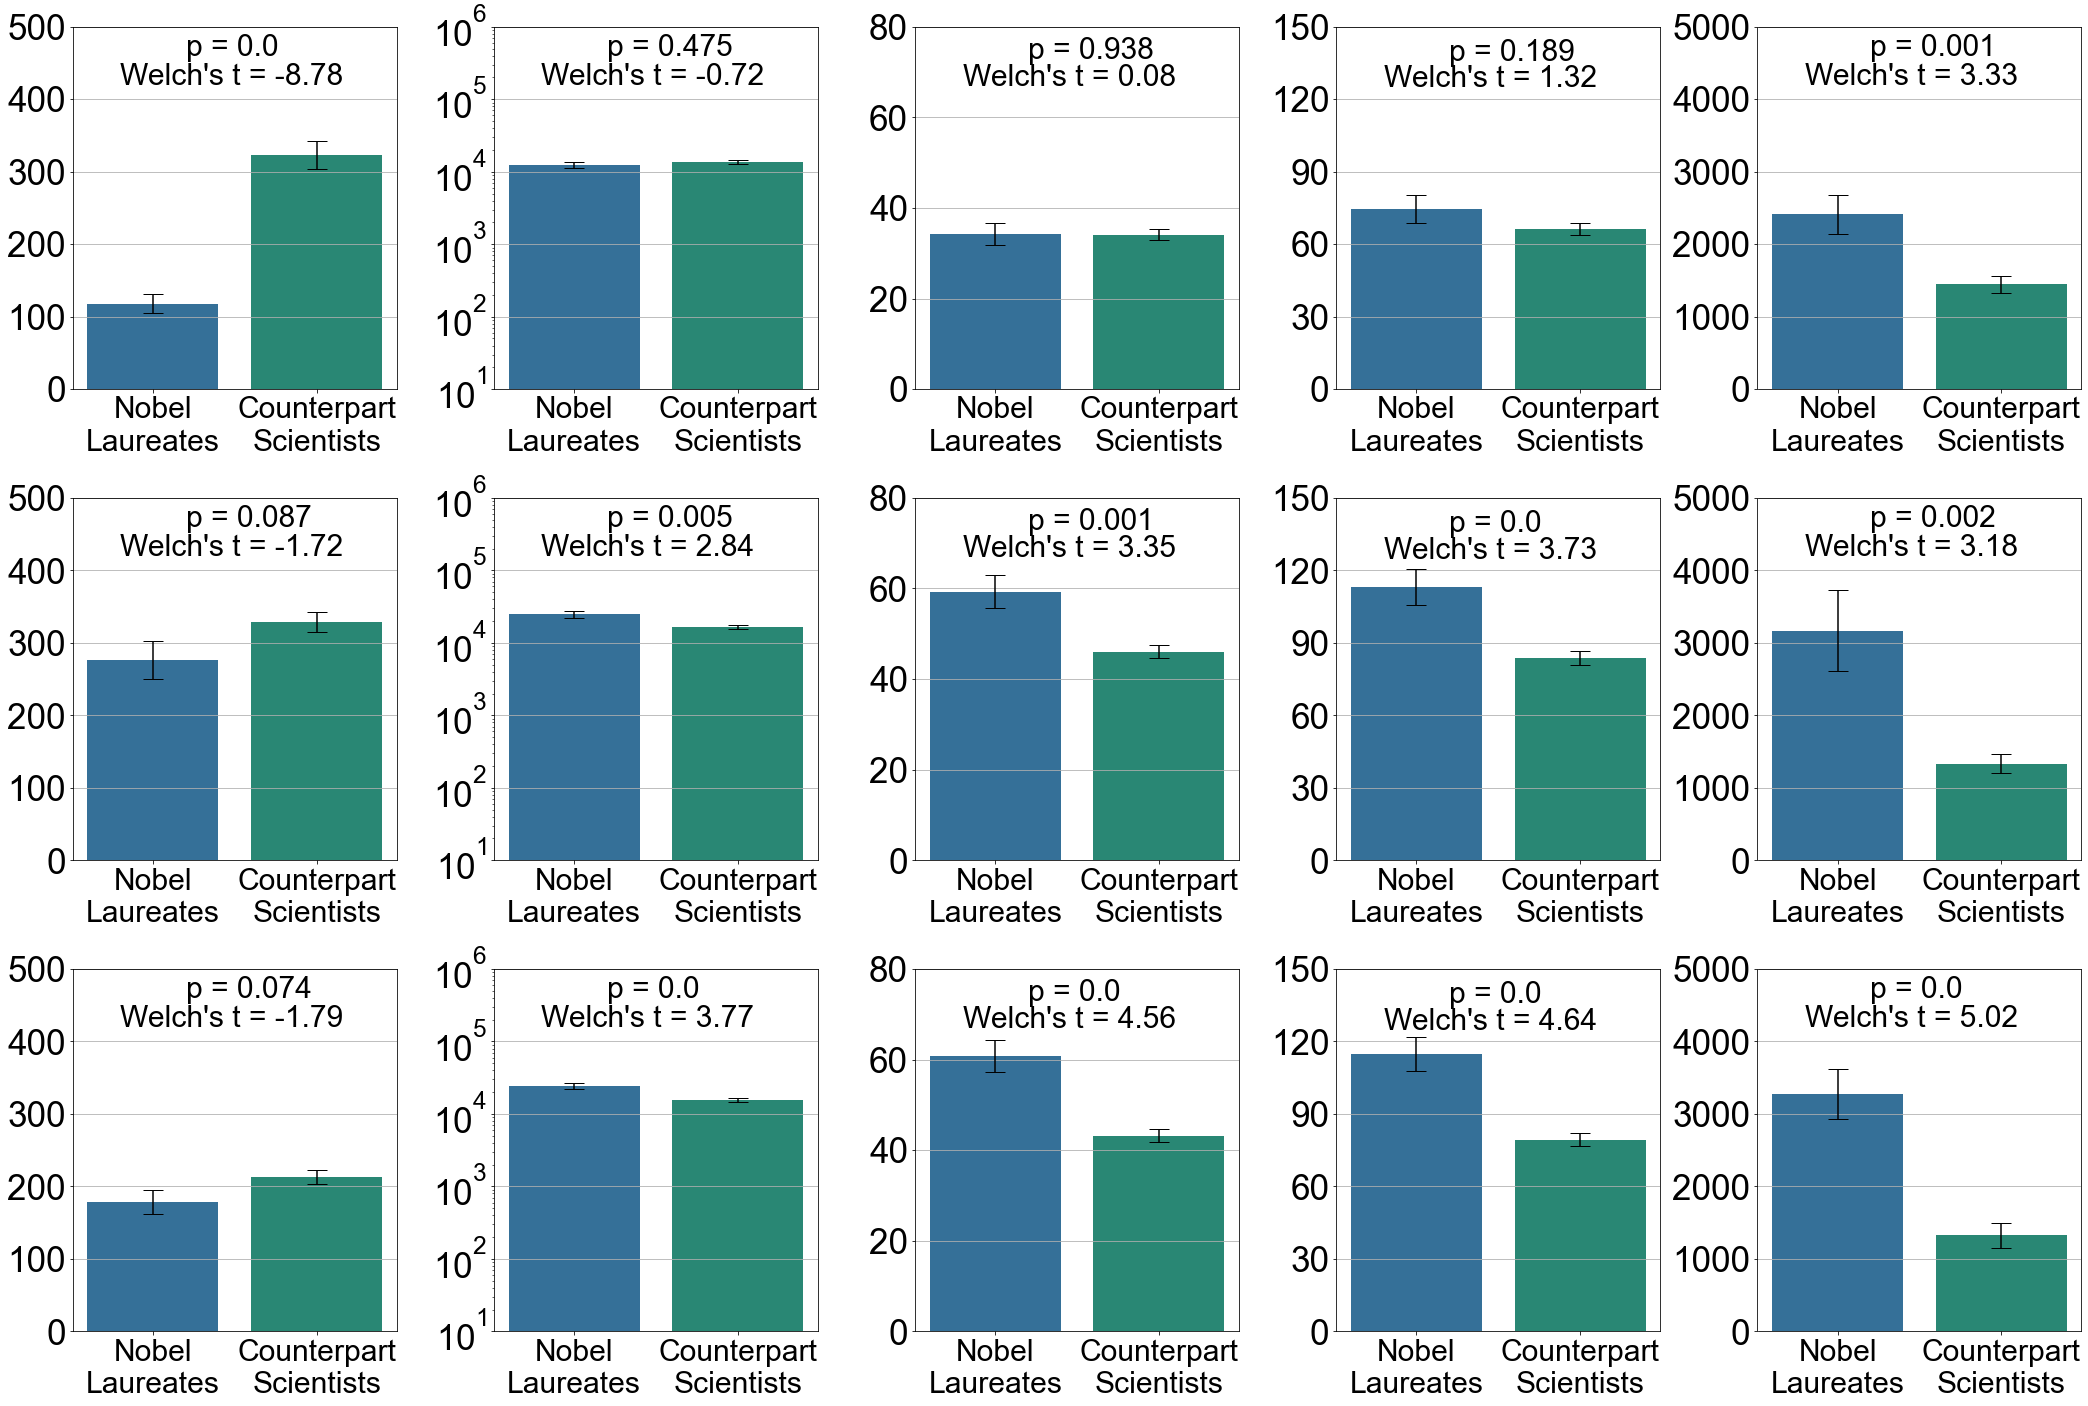

In [16]:
plt.subplots(3,5,figsize=(36,24))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.3)

for i in range(len(columnlst)):
    column = columnlst[i]
    d1 =    fflau1[column]
    d2 =    fflau2[column]
    d3 =    fflau3[column]
    d5 = fcounter1[column]
    d6 = fcounter2[column]
    d7 = fcounter3[column]
    d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
    std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
    dd = [ d1,d2,d3,d5,d6,d7]
    
    
    
    for j in range(3):
        ax = plt.subplot(3,5,i+1+j*5)
        plt.bar(y_pos, [d[j],d[j+3]], yerr=[std[j],std[j+3]],align='center', color= ['#1F618D','#117A65'],alpha=0.9,capsize=10)
        ax.yaxis.grid(True)
        
        t,p = scipy.stats.ttest_ind(dd[j].dropna() , dd[j+3].dropna(), equal_var=False, alternative='two-sided')
        plt.text(0.8,ytic2[i],"Welch's t = {}".format(np.around (t, 2 )),fontsize = 30)
        plt.text(1.2,ytic1[i],"p = {}".format(np.around (p, 3 )),fontsize = 30)
        
        if i==0:
            plt.yticks([0,100,200,300,400,500],size = 35)
        elif i==1:
            ax.set_yscale("log")
            plt.yticks([10e0,10e1,10e2,10e3,10e4,10e5],size = 35)
        elif i==2:
            plt.yticks([0,20,40,60,80],size = 35)
        elif i==3:
            plt.yticks([0,30,60,90,120,150],size = 35)
        else:
            plt.yticks([0,1000,2000,3000,4000,5000],size = 35)
        
        plt.xticks(y_pos,['Nobel\nLaureates','Counterpart\nScientists'],fontsize = 30)
        plt.yticks(size = 35)
#        plt.ylabel(fontsize = 35)
#         plt.title(size = 35)
#         plt.ylabel(labellst[i],fontsize = 35)
#         plt.title(tilst[j],size = 35)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 3\1.pdf",bbox_inches = 'tight')